In [47]:
import os
import sys

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


# set path to local libraries
dirP_str = '../../../library'
if dirP_str not in sys.path:
    sys.path.append(dirP_str)

import ml_utils as ml


%matplotlib inline

In [10]:
ds_path = "/Users/mhayman/Documents/Python/Optics/holodec-ml-data/"
ds_file = "synthetic_holograms_10particle_gamma_600x400_test.nc"

In [11]:
ds = xr.open_dataset(ds_path+ds_file)

In [28]:
zlim = [14e3+10e3,160e3-10e3]
sample_center = [0,0] # center x,y position of sample volume
sample_radius = 600   # radius of sample volume

In [45]:
h_idx = np.unique(ds['hid'].values).astype(int)
moments = np.zeros((4,h_idx.size))

for h in h_idx:
    part_idx = np.where(h == ds['hid'].values)[0]
    moments[:,h-1] = ml.calculate_d_moments(ds['x'].values[part_idx],
                                          ds['y'].values[part_idx],
                                          ds['z'].values[part_idx],
                                          ds['d'].values[part_idx],
                                          zlim=zlim,
                                          circ_center=sample_center,
                                          circ_radius=sample_radius)


The moment is zero in some cases because none of the particles were inside the sample volume.  Below shows the particle in x,y.  Also the particle may be eliminated based on z position.

(-600, 600)

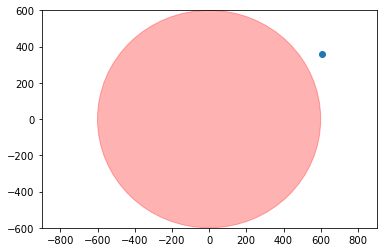

In [73]:
sample_circle = plt.Circle(sample_center, sample_radius, color='r',alpha=0.3)

idx_zero = np.where(moments[0,:] == 0)[0][0]+1
plt.scatter(ds['x'].values[idx_zero],ds['y'].values[idx_zero])
plt.gca().add_patch(sample_circle)
plt.xlim([-900,900])
plt.ylim([-600,600])

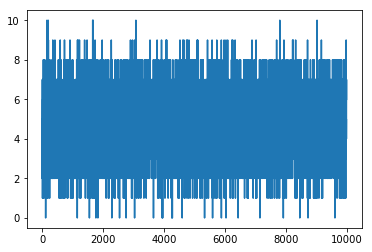

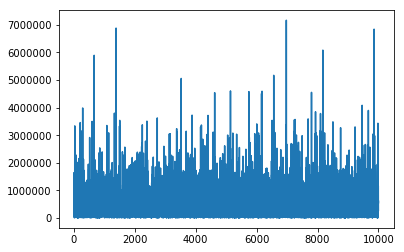

In [74]:
plt.figure()
plt.plot(moments[0,:])

plt.figure()
plt.plot(moments[3,:])